In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

In [10]:
import numpy as np
import os

In [11]:
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [12]:
pyber_ride_df=pd.read_csv("Resources/PyBer_ride_data.csv")
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


In [13]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [14]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


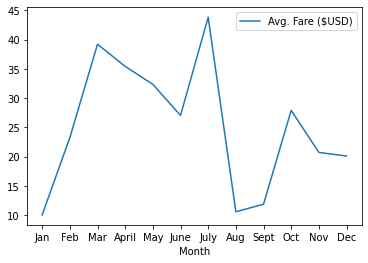

In [15]:
x_axis=np.arange(len(pyber_ride_df))
tick_locations=[value for value in x_axis]
pyber_ride_df.plot(x="Month",y="Avg. Fare ($USD)")
plt.xticks(tick_locations,pyber_ride_df["Month"])
plt.show()

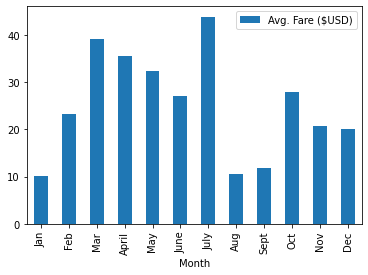

In [16]:
pyber_ride_df.plot(x="Month",y="Avg. Fare ($USD)",kind="bar")
plt.show()

In [17]:
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [18]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [19]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [20]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [21]:
sum(city_data_df["type"]=="Urban")

66

In [22]:
sum(city_data_df["type"]=="Suburban")

36

In [23]:
sum(city_data_df["type"]=="Rural")

18

In [24]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [25]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [26]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [27]:
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [28]:
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [29]:
Suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
Suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [30]:
Rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
Rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [31]:
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [32]:
suburban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [33]:
Rural_ride_count=Rural_cities_df.groupby(["city"]).count()["ride_id"]
Rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [34]:
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [35]:
suburban_avg_fare=Suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [36]:
Rural_avg_fare=Rural_cities_df.groupby(["city"]).mean()["fare"]
Rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [37]:
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [38]:
suburban_driver_count=Suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [39]:
Rural_driver_count=Rural_cities_df.groupby(["city"]).mean()["driver_count"]
Rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

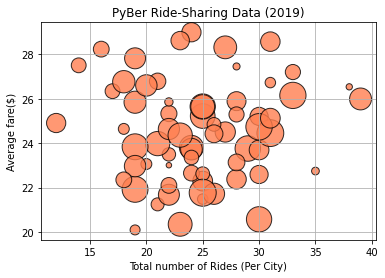

In [47]:
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c="coral",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average fare($)")
plt.xlabel("Total number of Rides (Per City)")
plt.grid(True)
plt.legend()

ValueError: x and y must be the same size

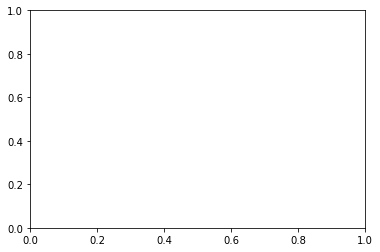

In [41]:
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c="skyblue",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average fare($)")
plt.xlabel("Total number of Rides (Per City)")
plt.grid(True)
plt.legend()

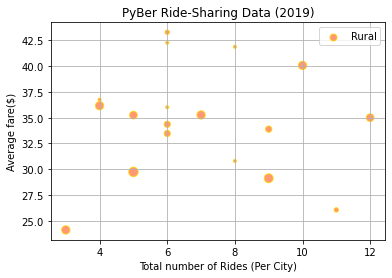

In [42]:
plt.scatter(Rural_ride_count,Rural_avg_fare,s=10*Rural_driver_count,c="coral",
           edgecolor="gold",linewidths=1,
           alpha=0.8,label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average fare($)")
plt.xlabel("Total number of Rides (Per City)")
plt.grid(True)
plt.legend()

ValueError: x and y must be the same size

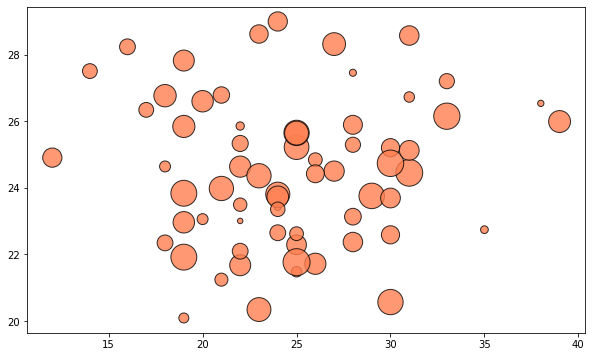

In [50]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c="coral",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c="skyblue",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Suburban")
plt.scatter(Rural_ride_count,Rural_avg_fare,s=10*Rural_driver_count,c="coral",
           edgecolor="gold",linewidths=1,
           alpha=0.8,label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average fare($)")
plt.xlabel("Total number of Rides (Per City)")
plt.grid(True)
lgnd=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1, loc="best",title="City Types")
plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize="12")
plt.savefing("analysis/Fig1.png")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

In [54]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [55]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [58]:
suburban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64